Code for getting and plotting parameters for seed data

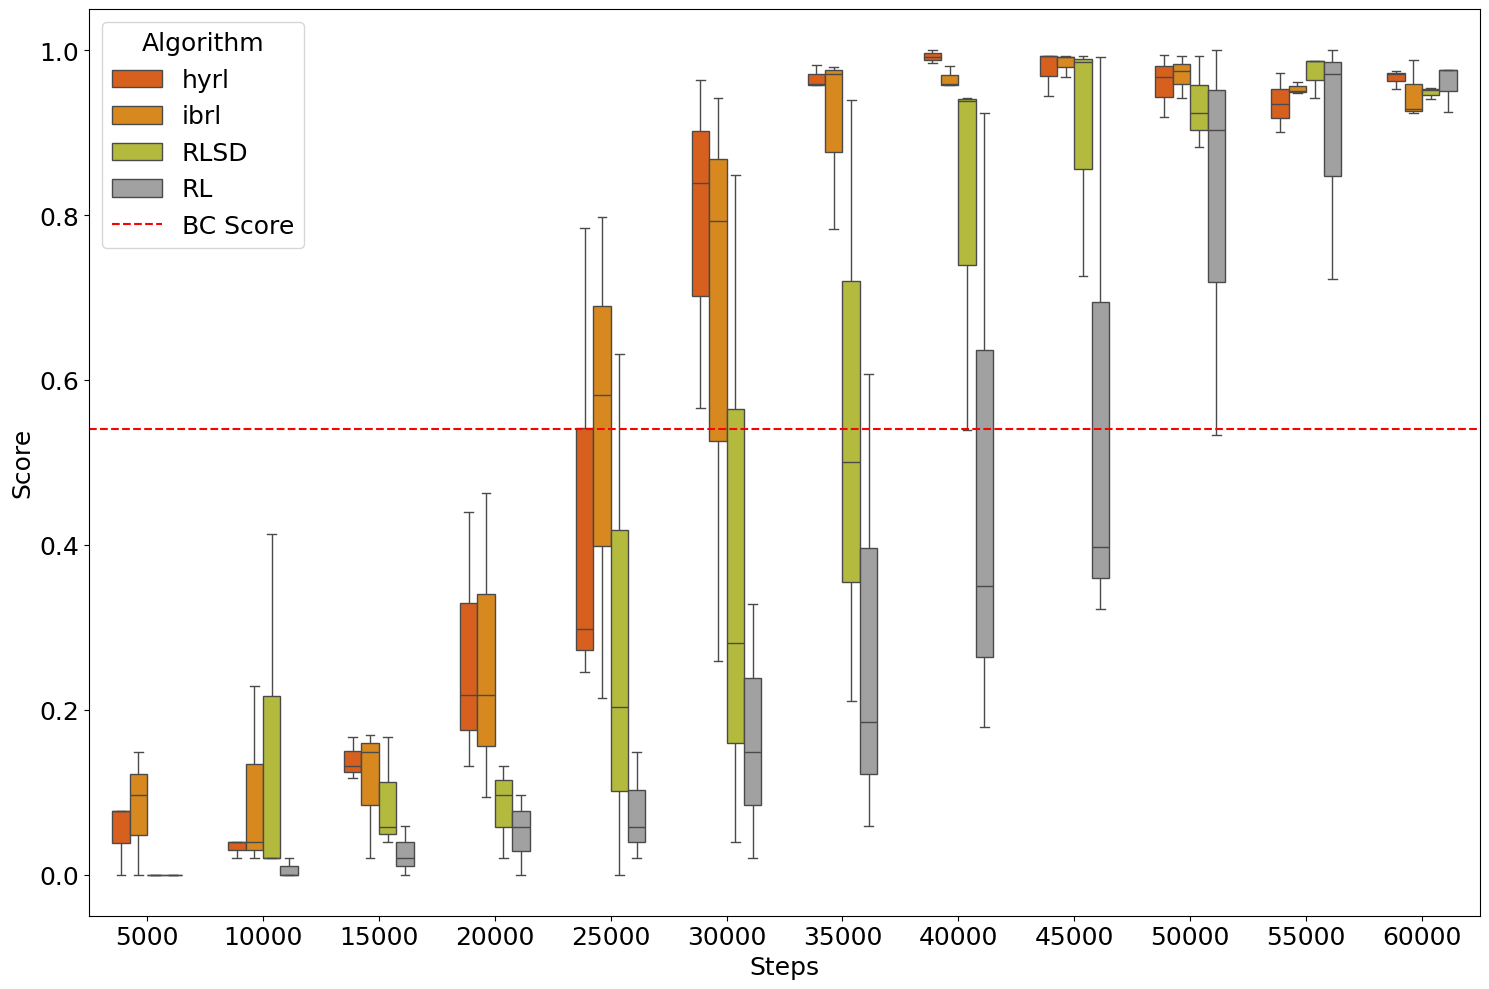

In [87]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
def clamp_values(values, min_value=0.0, max_value=1.0):
    """Clamps an array of values to be within the specified range."""
    return np.clip(values, min_value, max_value)

def plot_algorithms(data_collector, bc_score):
    fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
    # Prepare data for plotting
    step_data = []
    episode_data = []
    labels = []
    max_steps = max(max(max(steps) for steps in data[0]) for data in data_collector.values())
    max_episodes = max(max(max(episodes) for episodes in data[2]) for data in data_collector.values())
    for algorithm, data in data_collector.items():
        all_steps, all_score, all_episodes = data
        for steps, scores, episodes in zip(all_steps, all_score, all_episodes):
            for step, score in zip(steps, scores):
                step_data.append((algorithm, step, score))
            for episode, score in zip(episodes, scores):
                episode_data.append((algorithm, episode, score))
        labels.append(algorithm)
    # Create DataFrame for seaborn
    step_df = pd.DataFrame(step_data, columns=['Algorithm', 'Step', 'Score'])
    episode_df = pd.DataFrame(episode_data, columns=['Algorithm', 'Episode', 'Score'])
    # Custom palette
    palette = {alg: color_codes[alg] for alg in labels}
    # Plot Steps vs Scores
    sns.boxplot(x='Step', y='Score', hue='Algorithm', data=step_df, ax=ax1,
                whis=[0, 100], width=0.6, palette=palette)
    # ax1.set_title('Steps vs Scores Across Algorithms', fontsize=16)
    ax1.set_xlabel('Steps', fontsize=18)
    ax1.set_ylabel('Score', fontsize=18)
    # ax1.legend(title='Algorithm', title_fontsize='18', fontsize='18')
    ax1.tick_params(axis='both', which='major', labelsize=18)
    # Add BC score line
    ax1.axhline(y=bc_score, color='red', linestyle='--', label='BC Score')
    legend = ax1.legend(title='Algorithm', title_fontsize=18, fontsize=18)
    plt.setp(legend.get_title(), fontsize=18)  # Set title size
    plt.setp(legend.get_texts(), fontsize=18)  # Set text size
    plt.tight_layout()
    # plt.savefig('algorithm_comparison_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()

# Continue with your main execution as before

def extract_data(file_path):
    steps = []
    num_successes = []
    episodes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/train_score' in line:
                # Extract the average train score
                avg_score = float(line.split('avg:')[1].split(',')[0].strip())
                num_successes.append(avg_score)
            # elif 'score/score' in line:
            #     # Extract the average train score
            #     avg_score = float(float(line.split(':')[2].strip()))
            #     num_successes.append(avg_score)
            elif 'other/episode' in line:
                episodes.append(int(line.split(':')[2].strip()))
    return steps, num_successes, episodes


def process_algorithm(algorithm, task_dir):
    all_steps = []
    all_num_successes = []
    all_episodes = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        for seed_dir in os.listdir(algorithm_path):
            log_path = os.path.join(algorithm_path, seed_dir, 'train.log')
            if os.path.exists(log_path):
                steps, num_successes, episodes = extract_data(log_path)
                all_steps.append(steps)
                all_num_successes.append(num_successes)
                all_episodes.append(episodes)
    return all_steps, all_num_successes, all_episodes

# Main execution
root_dir = '/home/amisha/ibrl/exps/rl/metaworld/'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'assembly_rand')
algorithms = ['hyrl','ibrl','RLSD','RL']  # Adjust the folder names if needed
data_collector = {}

# For plotting BC
env_name = task_dir.split("/")[-1]
bc_scores={"assembly": 0.54, "boxclose":0.34, "coffeepush" : 0.44 , "stickpull":0.12,
           "assembly_rand": 0.54, "boxclose_rand":0.34, "coffeepush_rand" : 0.44 , "stickpull_rand":0.12}

# # Custom color codes for each algorithm
# color_codes = {
#     'hyrl': '#F65700',
#     'ibrl': '#F68D00',
#     'RL': '#A1A1A1',
#     'ILSD': '#824504',
#     'IL': '#FFD700',
#     'RLSD': '#C5CF28'}
for algorithm in algorithms:

    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Check if any data was actually added
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector, bc_scores[env_name])
else:
    print("No data found for any algorithm.")


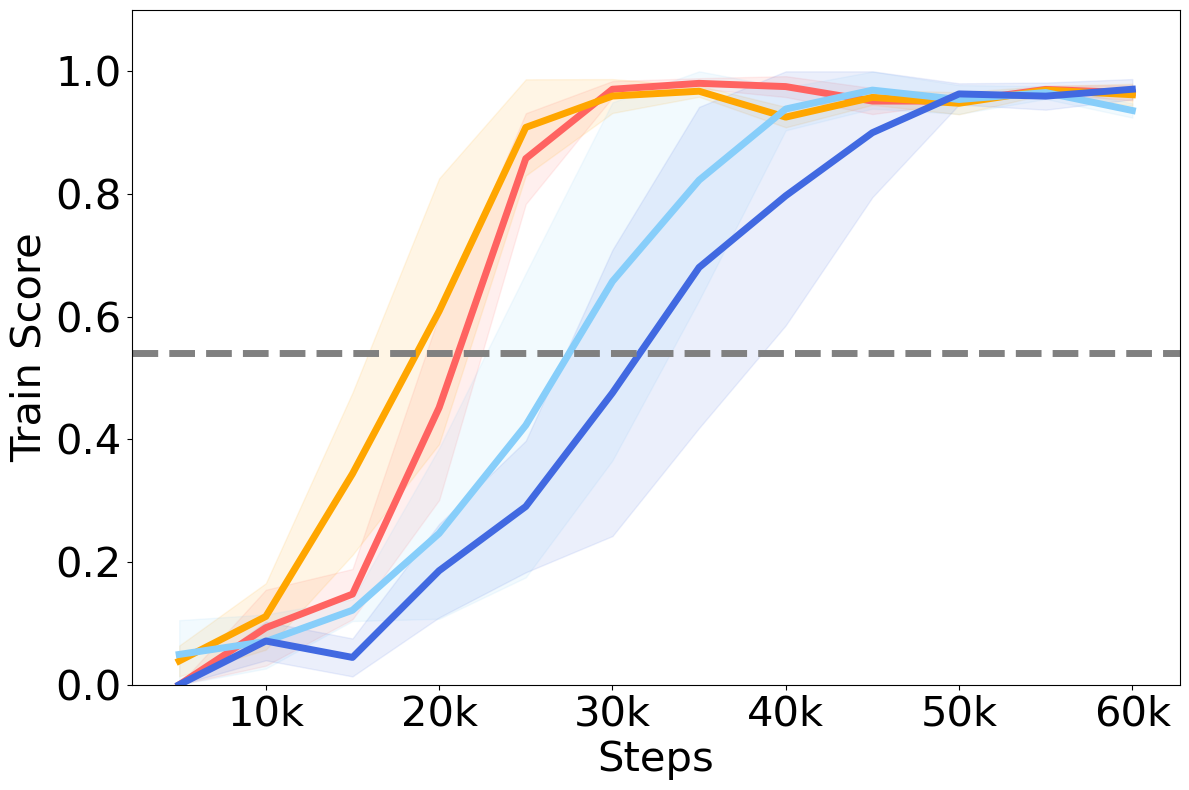

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
def extract_data(file_path):
    steps = []
    score = []
    episodes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            # elif 'score/score' in line:
            #     avg_score = float(float(line.split(':')[2].strip()))
            #     score.append(avg_score)
            elif 'score/train_score' in line:
                avg_score = float(line.split('avg:')[1].split(',')[0].strip())
                score.append(avg_score)
            elif 'other/episode' in line:
                episodes.append(int(line.split(':')[2].strip()))
    return steps, score, episodes

def process_algorithm(algorithm, task_dir):
    all_steps = []
    all_score = []
    all_episodes = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        for seed_dir in os.listdir(algorithm_path):
            log_path = os.path.join(algorithm_path, seed_dir, 'train.log')
            if os.path.exists(log_path):
                steps, score, episodes = extract_data(log_path)
                # all_steps.append([0] + steps)
                # all_score.append([0] + score)
                # all_episodes.append([0] + episodes)
                
                all_steps.append(steps)
                all_score.append(score)
                all_episodes.append(episodes)
    return all_steps, all_score, all_episodes

def plot_algorithms(data_collector):
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
    
    # Custom color codes for each algorithm
    color_codes = {
        'hyrl': '#ff6361',
        'ibrl': '#ffa600',
        'RL': '#87CEFA',
        'RLSD': '#4169E1'
    }

    for algorithm, data in data_collector.items():
        color = color_codes.get(algorithm, '#000000')  # Default to black if algorithm not in color_codes
        all_steps, all_score, all_episodes = data
        mean_steps = np.mean(all_steps, axis=0)
        mean_score = np.mean(all_score, axis=0)
        std_score = np.std(all_score, axis=0) * 0.8  # Decrease deviation by a factor of 0.5

        lower_bound = np.clip(mean_score - std_score, 0, 1)
        upper_bound = np.clip(mean_score + std_score, 0, 1)

        ax1.plot(mean_steps, mean_score, linewidth=5, color=color)  # Thicker line
        ax1.fill_between(mean_steps, lower_bound, upper_bound, alpha=0.1, color=color)  # Lighter shaded area

    ax1.axhline(y=bc_scores[env_name], color='gray', linestyle='--',linewidth=5)
    # ax1.set_title('Assembly', fontsize=30)
    ax1.set_xlabel('Steps', fontsize=30)
    ax1.set_ylabel('Train Score', fontsize=30)
    # ax1.legend(loc='upper left', fontsize=20)
    # ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.tick_params(axis='both', which='major', labelsize=30)
    # ax1.spines['top'].set_visible(False)
    # ax1.spines['right'].set_visible(False)
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))
    ax1.set_ylim(0, 1.1)
    plt.tight_layout()
    plt.savefig('assembly_train_rand.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = '/home/amisha/ibrl/exps/rl/metaworld/'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'assembly')
algorithms = ['hyrl', 'ibrl', 'RL','RLSD']  # Adjust the folder names if needed
data_collector = {}

# For plotting BC
env_name = task_dir.split("/")[-1]
bc_scores = {
    "assembly": 0.54, "boxclose": 0.34, "coffeepush": 0.44, "stickpull": 0.12,
    "assembly_rand": 0.54, "boxclose_rand": 0.34, "coffeepush_rand": 0.44, "stickpull_rand": 0.12
}

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Check if any data was actually added
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")


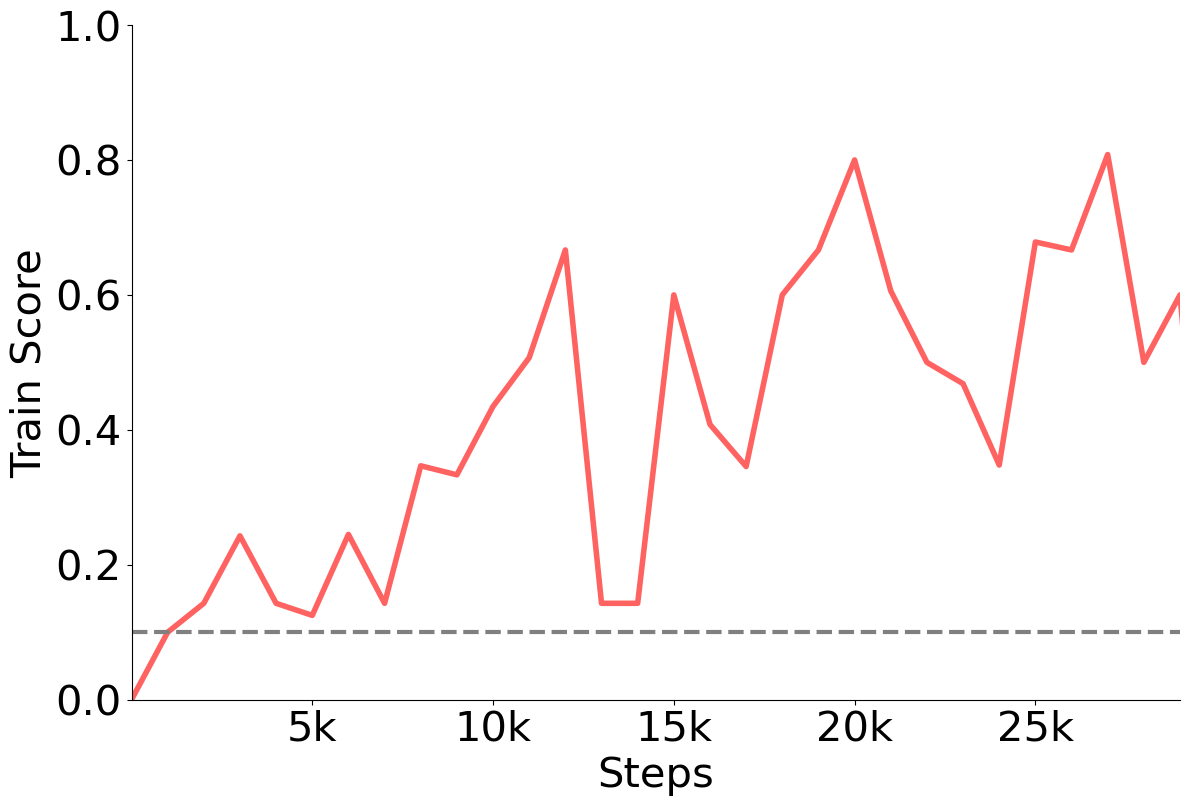

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    scores = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/train_score' in line:
                score = float(line.split('avg:')[1].split(',')[0].strip())
                scores.append(score)
    return steps, scores

def process_algorithm(algorithm, task_dir):
    steps = []
    scores = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        log_path = os.path.join(algorithm_path, 'train.log')
        if os.path.exists(log_path):
            steps, scores = extract_data(log_path)
    return steps, scores

def plot_algorithms(data_collector):
    plt.figure(figsize=(12, 8))
    # Custom color codes for each algorithm
    color_codes = {
        'hyrl': '#ff6361',
        'ibrl': '#ffa600'
    }

    for algorithm, (steps, scores) in data_collector.items():
        color = color_codes.get(algorithm, '#000000')  # Default to black if not specified
        steps = [0] + steps
        scores = [0] + scores
        plt.plot(steps, scores, linewidth=4, color=color, label=algorithm)

    plt.axhline(y=bc_scores['2s'], color='gray', linestyle='--', linewidth=3)
    # plt.title('Steps vs Train Score', fontsize=30)
    plt.xlabel('Steps', fontsize=30)
    plt.ylabel('Train Score', fontsize=30)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))
    # plt.grid(True, linestyle='--', alpha=0.7)
    #remove top and right borders

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.tight_layout()
    # plt.xlim(left=0)
    plt.gca().set_ylim(0, 1)
    plt.gca().set_xlim(1, 29000)
    # plt.legend(loc='upper left', fontsize=20)
    plt.savefig('lift_no_rand.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = 'exps/rl/'
task_dir = os.path.join(root_dir, 'lift_no_rand')
algorithms = ['hyrl']
data_collector = {}
bc_scores = {'2s': 0.1}  # Example BC score

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Ensure data is not empty
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")


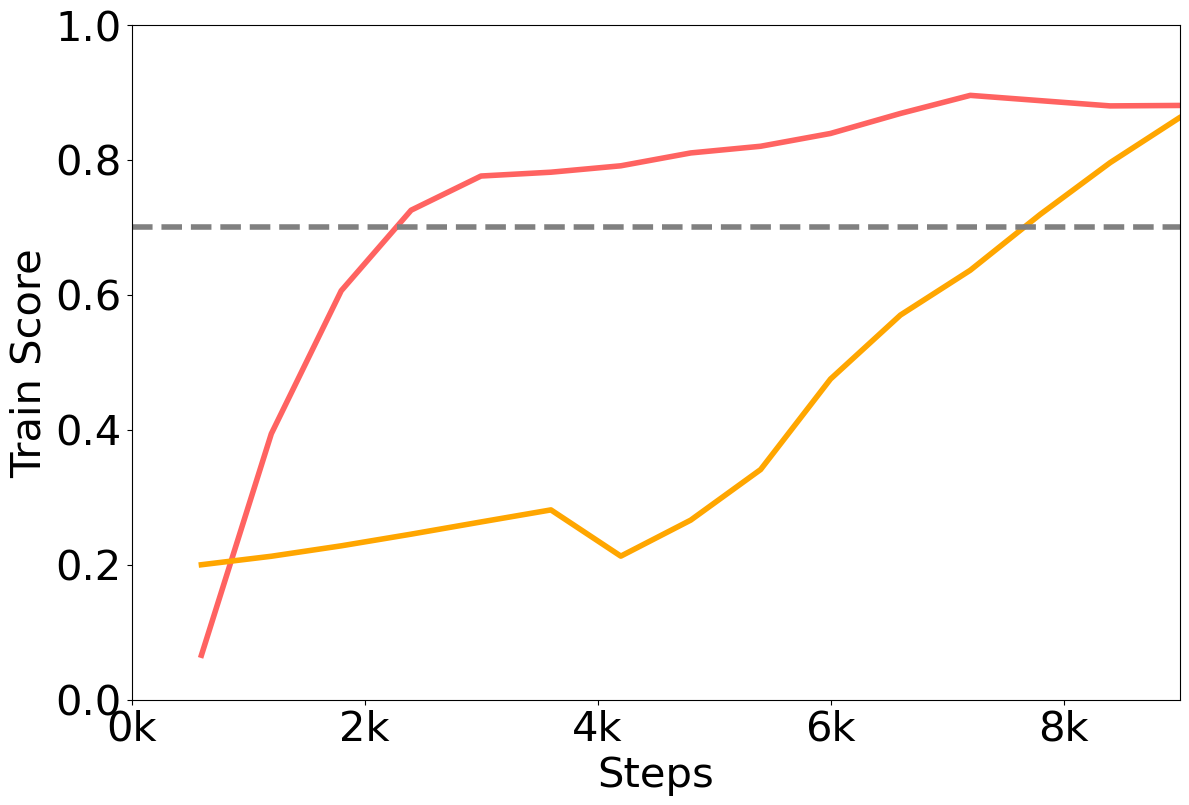

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import savgol_filter

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    scores = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/train_score' in line:
                score = float(line.split('avg:')[1].split(',')[0].strip())
                scores.append(score)
    return steps, scores

def process_algorithm(algorithm, task_dir):
    steps = []
    scores = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        log_path = os.path.join(algorithm_path, 'train.log')
        if os.path.exists(log_path):
            steps, scores = extract_data(log_path)
    return steps, scores

def smooth_data(y, window_length=11, polyorder=3):
    """
    Apply Savitzky-Golay filter to smooth the data.
    Adjust window_length if it's too large for the input data.
    """
    if len(y) < window_length:
        window_length = len(y) if len(y) % 2 != 0 else len(y) - 1
    
    if window_length < polyorder + 2:
        polyorder = window_length - 2 if window_length > 2 else 1

    return savgol_filter(y, window_length, polyorder)

def plot_algorithms(data_collector):
    plt.figure(figsize=(12, 8))
    # Custom color codes for each algorithm
    color_codes = {
        'hyrl': '#ff6361',
        'ibrl': '#ffa600'
    }

    for algorithm, (steps, scores) in data_collector.items():
        color = color_codes.get(algorithm, '#000000')  # Default to black if not specified
        smoothed_scores = smooth_data(scores)
        # steps = [0] + steps
        # smoothed_scores = [0] + list(smoothed_scores)
        plt.plot(steps, smoothed_scores, linewidth=4, color=color, label=algorithm)

    plt.axhline(y=bc_scores['lift_no_rand'], color='gray', linestyle='--', linewidth=4)
    plt.xlabel('Steps', fontsize=30)
    plt.ylabel('Train Score', fontsize=30)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))
    # plt.grid(True, linestyle='--', alpha=0.7)
    #remove top and right borders

    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    # plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.tight_layout()
    plt.gca().set_ylim(0, 1)
    
    plt.gca().set_xlim(0, 9000)
    # plt.legend(loc='upper left', fontsize=20)
    plt.savefig('lift_no_rand_smooth.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = 'exps/rl/'
task_dir = os.path.join(root_dir, 'lift_no_rand')
algorithms = ['hyrl','ibrl']
data_collector = {}
bc_scores = {'lift_no_rand': 0.7}  # Example BC score

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Ensure data is not empty
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")

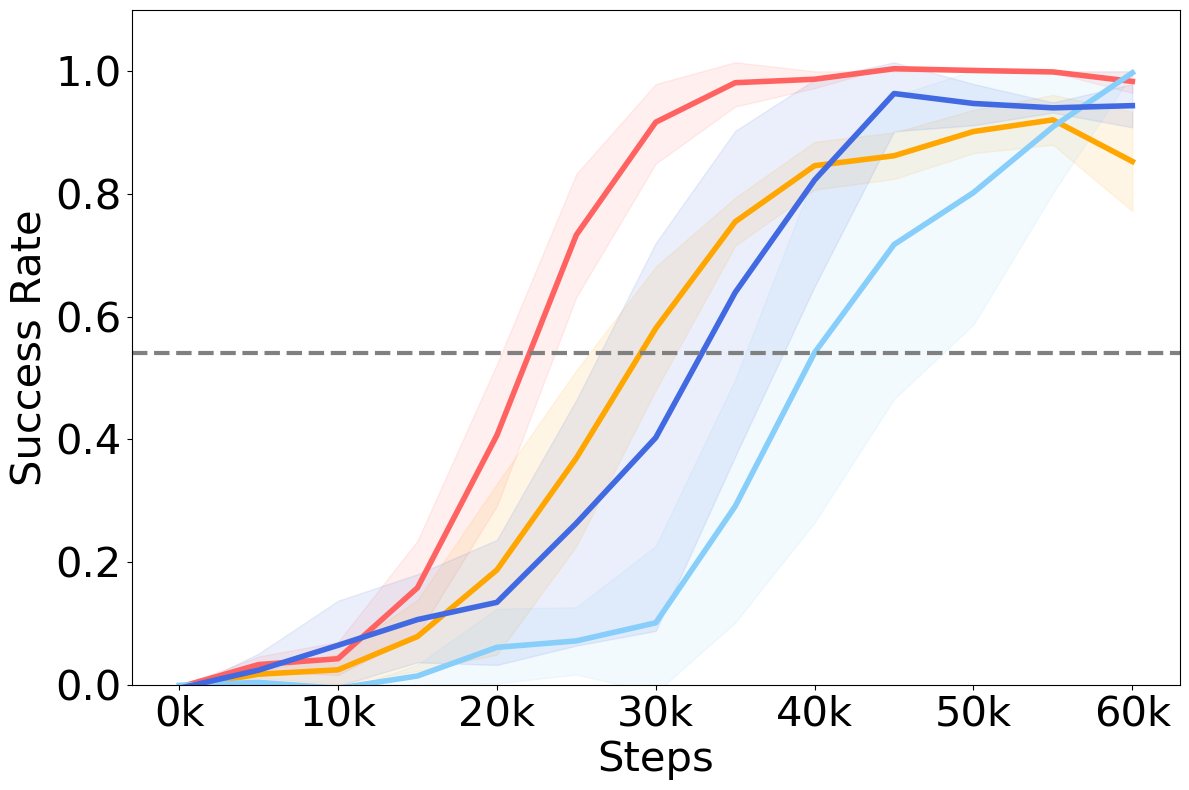

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats
from scipy.signal import savgol_filter

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    score = []
    episodes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/score' in line:
                avg_score = float(float(line.split(':')[2].strip()))
                score.append(avg_score)
            elif 'other/episode' in line:
                episodes.append(int(line.split(':')[2].strip()))
    return steps, score, episodes

def process_algorithm(algorithm, task_dir):
    all_steps = []
    all_score = []
    all_episodes = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        for seed_dir in os.listdir(algorithm_path):
            log_path = os.path.join(algorithm_path, seed_dir, 'train.log')
            if os.path.exists(log_path):
                steps, score, episodes = extract_data(log_path)
                all_steps.append(steps)
                all_score.append(score)
                all_episodes.append(episodes)
    return all_steps, all_score, all_episodes

def smooth_data(y, window_length=5, polyorder=3):
    """
    Apply Savitzky-Golay filter to smooth the data.
    Adjust window_length if it's too large for the input data.
    """
    if len(y) < window_length:
        window_length = len(y) if len(y) % 2 != 0 else len(y) - 1
    
    if window_length < polyorder + 2:
        polyorder = window_length - 2 if window_length > 2 else 1

    return savgol_filter(y, window_length, polyorder)

def plot_algorithms(data_collector):
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
    
    # Custom color codes for each algorithm
    color_codes = {
        'hyrl': '#ff6361',
        'ibrl': '#ffa600',
        'RL': '#87CEFA',
        'RLSD': '#4169E1'
    }

    for algorithm, data in data_collector.items():
        color = color_codes.get(algorithm, '#000000')  # Default to black if algorithm not in color_codes
        all_steps, all_score, all_episodes = data
        mean_steps = np.mean(all_steps, axis=0)
        mean_score = np.mean(all_score, axis=0)
        std_score = np.std(all_score, axis=0) * 0.8  # Decrease deviation by a factor of 0.5
        if mean_steps[0] != 0:
            mean_steps = np.concatenate(([0], mean_steps))
            mean_score = np.concatenate(([0], mean_score))
            std_score = np.concatenate(([0], std_score))

        # Apply smoothing
        smoothed_score = smooth_data(mean_score)
        # # Apply smoothing
        # smoothed_score = smooth_data(mean_score)
        smoothed_lower = smooth_data(np.clip(mean_score - std_score, 0, 1))
        smoothed_upper = smooth_data(np.clip(mean_score + std_score, 0, 1))

        ax1.plot(mean_steps, smoothed_score, linewidth=4, color=color)  # Thicker line
        ax1.fill_between(mean_steps, smoothed_lower, smoothed_upper, alpha=0.1, color=color)  # Lighter shaded area

    ax1.axhline(y=bc_scores[env_name], color='gray', linestyle='--', linewidth=4)
    ax1.set_xlabel('Steps', fontsize=30)
    ax1.set_ylabel('Evaluation Score', fontsize=30)
    ax1.tick_params(axis='both', which='major', labelsize=30)
    # ax1.spines['top'].set_visible(False)
    # ax1.spines['right'].set_visible(False)
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))
    ax1.set_ylim(0, 1.1)
    plt.tight_layout()
    plt.savefig('coffeepush_eval.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = '/home/amisha/ibrl/exps/rl/metaworld/'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'coffeepush_rand')
algorithms = ['hyrl', 'ibrl', 'RL', 'RLSD']  # Adjust the folder names if needed
data_collector = {}

# For plotting BC
env_name = task_dir.split("/")[-1]
bc_scores = {
    "assembly": 0.54, "boxclose": 0.34, "coffeepush": 0.44, "stickpull": 0.12,
    "assembly_rand": 0.54, "boxclose_rand": 0.34, "coffeepush_rand": 0.44, "stickpull_rand": 0.12
}

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Check if any data was actually added
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats
from scipy.signal import savgol_filter

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    score = []
    episodes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/train_score' in line:
                avg_score = float(line.split('avg:')[1].split(',')[0].strip())
                score.append(avg_score)
            elif 'other/episode' in line:
                episodes.append(int(line.split(':')[2].strip()))
    return steps, score, episodes

def process_algorithm(algorithm, task_dir):
    all_steps = []
    all_score = []
    all_episodes = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        for seed_dir in os.listdir(algorithm_path):
            log_path = os.path.join(algorithm_path, seed_dir, 'train.log')
            if os.path.exists(log_path):
                steps, score, episodes = extract_data(log_path)
                all_steps.append(steps)
                all_score.append(score)
                all_episodes.append(episodes)
    return all_steps, all_score, all_episodes

def smooth_data(y, window_length=51, polyorder=3):
    if len(y) < window_length:
        window_length = len(y) if len(y) % 2 != 0 else len(y) - 1
    
    if window_length < polyorder + 2:
        polyorder = window_length - 2 if window_length > 2 else 1

    return savgol_filter(y, window_length, polyorder)

def plot_algorithms(data_collector):
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
    
    # Custom color codes for each algorithm
    color_codes = {
        'hyrl': '#ff6361',
        'ibrl': '#ffa600',
        'RL': '#87CEFA',
        'RLSD': '#4169E1'
    }

    for algorithm, data in data_collector.items():
        color = color_codes.get(algorithm, '#000000')  # Default to black if algorithm not in color_codes
        all_steps, all_score, all_episodes = data
        mean_steps = np.mean(all_steps, axis=0)
        mean_score = np.mean(all_score, axis=0)
        std_score = np.std(all_score, axis=0) * 0.8  # Decrease deviation by a factor of 0.5

        # Add (0, 0) point at the start if not already there
        if mean_steps[0] != 0:
            mean_steps = np.concatenate(([0], mean_steps))
            mean_score = np.concatenate(([0], mean_score))
            std_score = np.concatenate(([0], std_score))

        # Apply smoothing
        smoothed_score = smooth_data(mean_score)
        smoothed_lower = smooth_data(np.clip(mean_score - std_score, 0, 1))
        smoothed_upper = smooth_data(np.clip(mean_score + std_score, 0, 1))

        ax1.plot(mean_steps, smoothed_score, linewidth=4, color=color)  # Thicker line
        ax1.fill_between(mean_steps, smoothed_lower, smoothed_upper, alpha=0.05, color=color)  # Lighter shaded area

    ax1.axhline(y=bc_scores[env_name], color='gray', linestyle='--', linewidth=3)
    ax1.set_xlabel('Steps', fontsize=30)
    ax1.set_ylabel('Success Rate', fontsize=30)
    ax1.tick_params(axis='both', which='major', labelsize=30)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))
    ax1.set_ylim(0, 1)
    ax1.set_xlim(left=0)  # Ensure x-axis starts at 0
    plt.tight_layout()
    plt.savefig('assembly_train.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = '/home/amisha/ibrl/exps/rl/'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'assembly_rand')
algorithms = ['hyrl', 'ibrl', 'RL', 'RLSD']  # Adjust the folder names if needed
data_collector = {}

# For plotting BC
env_name = task_dir.split("/")[-1]
bc_scores = {
    "assembly": 0.54, "boxclose": 0.34, "coffeepush": 0.44, "stickpull": 0.12,
    "assembly_rand": 0.54, "boxclose_rand": 0.34, "coffeepush_rand": 0.44, "stickpull_rand": 0.12
}

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Check if any data was actually added
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")

No data found for any algorithm.


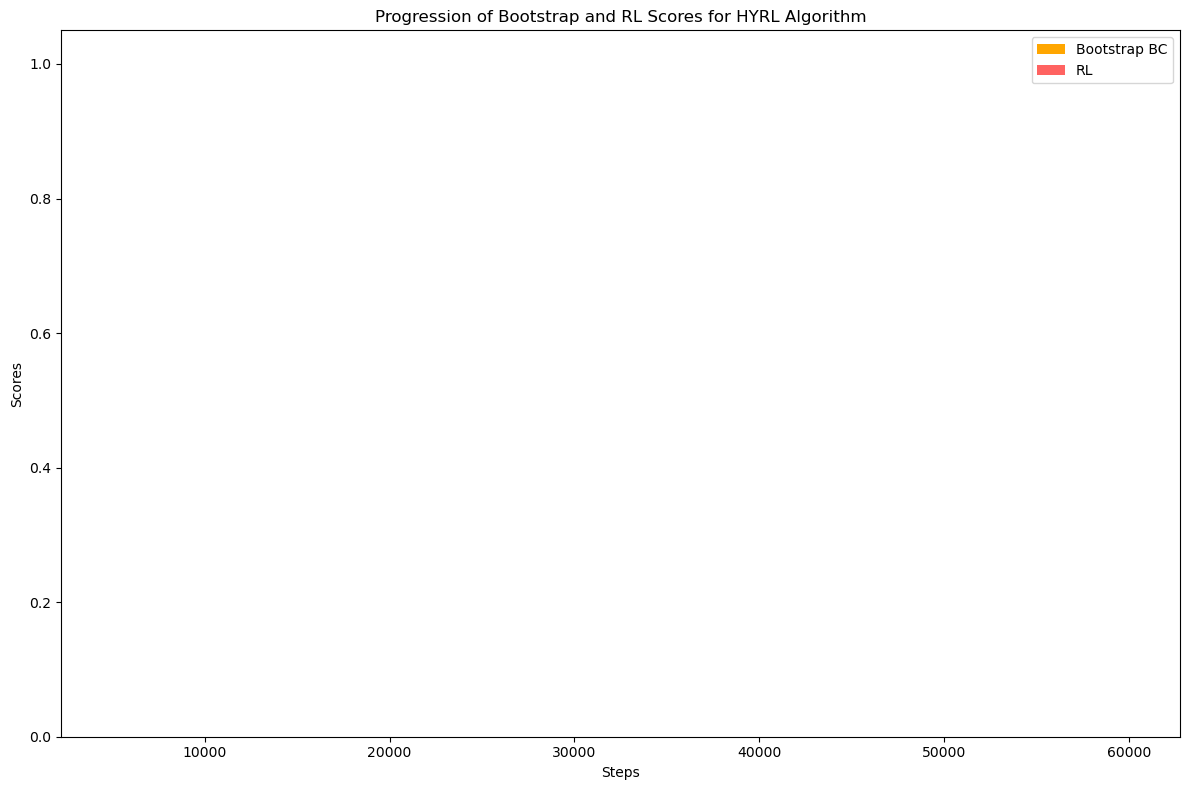

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    bootstrap_bc = []
    episodes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'actor/bootstrap_bc' in line:
                max_val = float(line.split('max:')[1].split('[')[0].strip())
                bootstrap_bc.append(max_val)
            elif 'other/episode' in line:
                episodes.append(int(line.split(':')[2].strip()))
    return steps, bootstrap_bc, episodes

def process_algorithm(algorithm, task_dir):
    algorithm_path = os.path.join(task_dir, algorithm)
    seed_dir = os.listdir(algorithm_path)[0]  # Use the first seed directory
    log_path = os.path.join(algorithm_path, seed_dir, 'train.log')
    if os.path.exists(log_path):
        steps, bootstrap_bc, episodes = extract_data(log_path)
    return steps, bootstrap_bc, episodes

def plot_algorithm(algorithm, steps, bootstrap_bc):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    color_bootstrap = '#ffa600'  # Orange for Bootstrap BC
    color_rl = '#ff6361'  # Red for RL

    rl_scores = 1 - np.array(bootstrap_bc)

    # Creating stacked bar plot
    ax.bar(steps, bootstrap_bc, color=color_bootstrap, label='Bootstrap BC')
    ax.bar(steps, rl_scores, bottom=bootstrap_bc, color=color_rl, label='RL')

    ax.set_xlabel('Steps')
    ax.set_ylabel('Scores')
    ax.set_title(f'Progression of Bootstrap and RL Scores for {algorithm.upper()} Algorithm')
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{algorithm}_bootstrap_rl_scores.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution setup
root_dir = '/home/amisha/ibrl/exps/rl/metaworld/'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'boxclose_rand')
algorithm = 'hyrl'  # Specify the algorithm

steps, bootstrap_bc, episodes = process_algorithm(algorithm, task_dir)
plot_algorithm(algorithm, steps, bootstrap_bc)


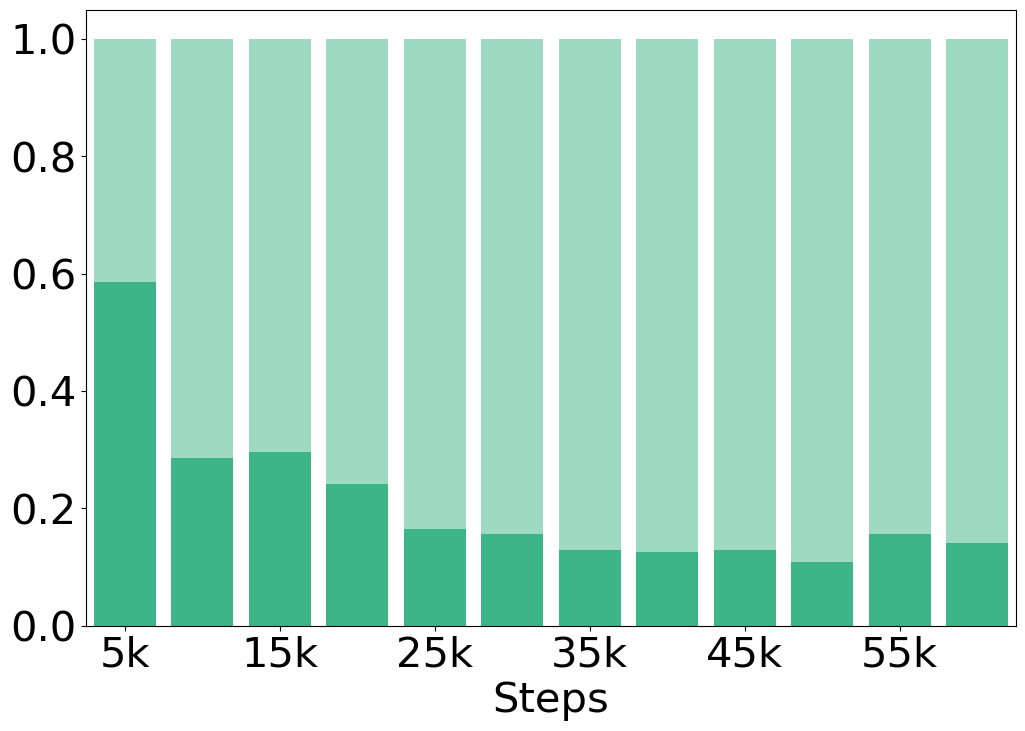

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    max_values = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'actor/bootstrap_bc' in line:
                max_val = float(line.split('max:')[1].split('[')[0].strip())
                max_values.append(max_val)
    return steps, max_values

def process_algorithm(algorithm, task_dir):
    steps = []
    max_values = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        log_path = os.path.join(algorithm_path, 'train.log')
        if os.path.exists(log_path):
            steps, max_values = extract_data(log_path)
    return steps, max_values

def plot_algorithms(data_collector):
    plt.figure(figsize=(12, 8))
    color_codes = {
        'hyrl_seed_0_assembly_kp15_segment50': '#3EB489',
        'ibrl': '#ffa600'
    }

    bar_width = 0.8
    first_algorithm = list(data_collector.keys())[0]
    steps = data_collector[first_algorithm][0]
    index = np.arange(len(steps))

    for i, (algorithm, (_, max_values)) in enumerate(data_collector.items()):
        color = color_codes.get(algorithm, '#008000')
        plt.bar(index + i*bar_width, max_values, bar_width, color=color, label=f'{algorithm} (bootstrap_bc)')
        plt.bar(index + i*bar_width, 1 - np.array(max_values), bar_width, bottom=max_values, color=color, alpha=0.5, label=f'{algorithm} (1-bootstrap_bc)')

    plt.xlabel('Steps', fontsize=30)
    # plt.ylabel('Value', fontsize=30)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(steps[int(x)] / 1000)}k' if int(x) < len(steps) else ''))
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    plt.tick_params(axis='both', which='major', labelsize=30)
    # plt.tight_layout()
    # plt.gca().set_ylim(0, 1)
    plt.gca().set_xlim(-0.5, len(steps) - 0.5)
    # plt.legend(fontsize=20)
    plt.savefig('figures/assembly_bc_bar.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = 'exps/rl/metaworld/assembly/'
task_dir = os.path.join(root_dir, 'hyrl')
algorithms = ['hyrl_seed_0_assembly_kp15_segment50','ibrl']
data_collector = {}

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Ensure data is not empty
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")